<a href="https://colab.research.google.com/github/usshaa/BK_BIRLA_DL/blob/main/03_DL/Gradient_Descent_Optimizer_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient Descent & Optimizer Strategies**

### **Learning Objectives**

* Understand how different gradient descent strategies work.
* Compare optimizer performance (SGD, Momentum, RMSProp, Adam, etc.)
* Visualize how optimizers affect training speed and convergence.
* Address common challenges: **vanishing** and **exploding** gradients.
* Learn how techniques like **early stopping** and **gradient clipping** help mitigate optimizer-related issues.

```
- If weights are initialized too large, the network can immediately produce nan.

- If input features (X_train) are not scaled, gradients can become unstable.
Optimizers like Adam/RMSProp internally handle gradient magnitudes better.

- If you use sigmoid or tanh in deeper networks, they can cause vanishing/exploding gradients.

```

### **1. Setup & Dataset**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load a synthetic regression dataset
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples=1000, n_features=20, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **2. Define a Simple Neural Network**

In [6]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=20))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    return model

### **3. Try with Different Optimizers**

#### 🔸 A. Stochastic Gradient Descent (SGD)

In [13]:
model_sgd = build_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='mse', metrics=['mae'])
history_sgd = model_sgd.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)
model_sgd.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan -

#### 🔸 B. SGD with Momentum

In [8]:
model_momentum = build_model()
model_momentum.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mse', metrics=['mae'])
history_momentum = model_momentum.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)
model_momentum.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan -

#### 🔸 C. RMSProp

In [9]:
model_rmsprop = build_model()
model_rmsprop.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=['mae'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)
model_rmsprop.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88.9086 - mae: 7.2086 - val_loss: 169.1486 - val_mae: 10.8173
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.7539 - mae: 7.2189 - val_loss: 173.7574 - val_mae: 10.9531
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.2490 - mae: 7.4684 - val_loss: 167.4480 - val_mae: 10.8544
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.5219 - mae: 6.9013 - val_loss: 167.8837 - val_mae: 10.8934
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.7106 - mae: 7.0463 - val_loss: 170.4541 - val_mae: 10.8481
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75.7630 - mae: 6.8360 - val_loss: 170.5359 - val_mae: 10.9255
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.9175 - mae: 6.9849 - val_loss: 173.7824 - val_mae: 10.9545
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4434 - mae: 6.5299 - val_loss: 169.4797 - val_mae: 10.8127
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

#### 🔸 D. Adam

In [10]:
model_adam = build_model()
model_adam.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history_adam = model_adam.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)
model_adam.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 126.5144 - mae: 8.5710 - val_loss: 213.6366 - val_mae: 11.7513
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.3269 - mae: 8.1560 - val_loss: 217.8711 - val_mae: 12.0279
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.8407 - mae: 7.4849 - val_loss: 214.6227 - val_mae: 11.8233
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100.8711 - mae: 7.7036 - val_loss: 216.8522 - val_mae: 11.9065
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 101.3994 - mae: 7.8382 - val_loss: 212.5361 - val_mae: 11.7679
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101.6005 - mae: 7.6342 - val_loss: 214.8861 - val_mae: 11.8064
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.5571 - mae: 7.5204 - val_loss: 212.7497 - val_mae: 11.7664
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 108.1318 - mae: 7.9249 - val_loss: 214.0205 - val_mae: 11.8181
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━

### **4. Visual Comparison of Loss Curves**

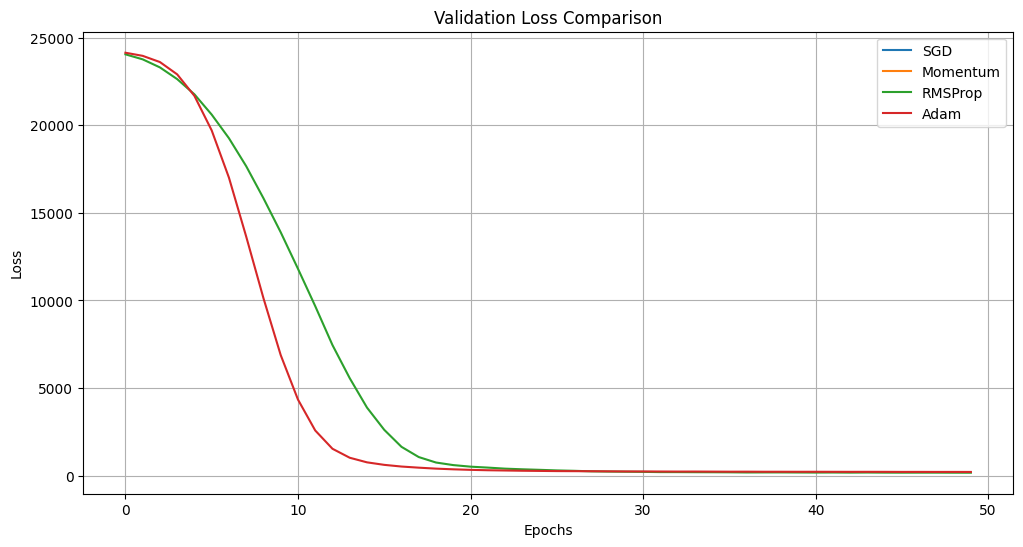

In [14]:
plt.figure(figsize=(12,6))

plt.plot(history_sgd.history['val_loss'], label='SGD')
plt.plot(history_momentum.history['val_loss'], label='Momentum')
plt.plot(history_rmsprop.history['val_loss'], label='RMSProp')
plt.plot(history_adam.history['val_loss'], label='Adam')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### **5. Explaining Vanishing & Exploding Gradient**

* Use deep network to show vanishing gradient


In [15]:
model_deep = Sequential()

In [16]:
for _ in range(10):  # More layers = more vanishing/exploding
    model_deep.add(Dense(128, activation='sigmoid', input_dim=20))
model_deep.add(Dense(1))

In [18]:
model_deep.compile(optimizer='sgd', loss='mse')
history_deep = model_deep.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)
model_deep.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21534.7480 - val_loss: 24251.1016
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20307.4414 - val_loss: 24252.5137
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20464.4922 - val_loss: 24260.2656
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20007.8945 - val_loss: 24251.3027
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20064.0840 - val_loss: 24249.7090
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20791.8555 - val_loss: 24254.7656
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19681.1602 - val_loss: 24247.8652
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19668.4492 - val_loss: 24250.1680
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19972.4961 - val_loss: 24249.9688
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19833.6309 - val_loss: 24250.8906
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20983.1074 - val_los

# "Why sigmoid + deep layers lead to vanishing gradients?"

| Problem                | Reason                                                 | Fix                       |
| ---------------------- | ------------------------------------------------------ | ------------------------- |
| **Vanishing Gradient** | Sigmoid activation flattens & small gradients multiply | Use **ReLU** activation   |
|                        | Poor weight initialization                             | Use **He Initialization** |


### **6. Fix: Use ReLU & He Initialization**

In [19]:
model_relu = Sequential()

In [20]:
for _ in range(10):
    model_relu.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_dim=20))
model_relu.add(Dense(1))

In [21]:
model_relu.compile(optimizer='sgd', loss='mse')
history_relu = model_relu.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)
model_relu.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: na

### **7. Early Stopping Implementation**

EarlyStopping(monitor='val_loss', patience=5) is a technique used during training to stop the training process early when the model is no longer improving on the validation set.

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

What is EarlyStopping?
  - A callback that monitors a chosen metric (like val_loss, val_accuracy, etc.)
  - If the metric doesn’t improve for a certain number of epochs, training is stopped automatically.
  - This helps to prevent overfitting and save training time.

In [24]:
model_es = build_model()
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [25]:
model_es.compile(optimizer='adam', loss='mse')
history_es = model_es.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop], verbose=0)
model_es.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop], verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 57.6768 - val_loss: 193.0553
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.8654 - val_loss: 192.7343
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.2354 - val_loss: 192.2982
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.3478 - val_loss: 192.9541
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.1086 - val_loss: 191.1904
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.4999 - val_loss: 194.0193
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.1699 - val_loss: 192.2712
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.5226 - val_loss: 190.6496
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.8756 - val_loss: 191.4368
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44.1059 - val_loss: 192.6997
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 49.2117 - val_loss: 190.6757
Epoch 12/100
20/20 ━━━━━━━━━

### **8. Gradient Clipping**

During backpropagation, if the gradients become too large, they can cause:

Model weights to blow up (become NaN)

Training instability or divergence

Clipping controls this by scaling down gradients that are too big.

In [26]:
from tensorflow.keras.optimizers import Adam

How does clipnorm work?
  - It checks the L2 norm (Euclidean length) of the entire gradient vector.
  - If the norm is greater than 1.0, it scales it down so its norm becomes exactly 1.0.
  - If it’s already below 1.0, it leaves the gradients unchanged.

In [27]:
opt_clip = Adam(learning_rate=0.001, clipnorm=1.0)

In [28]:
model_clip = build_model()
model_clip.compile(optimizer=opt_clip, loss='mse')
history_clip = model_clip.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)
model_clip.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.4317 - val_loss: 152.7630
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.8283 - val_loss: 154.4340
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.0179 - val_loss: 153.2959
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 72.3924 - val_loss: 159.9727
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.6795 - val_loss: 153.2461
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74.2700 - val_loss: 151.9234
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.0416 - val_loss: 151.9615
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.0382 - val_loss: 152.0204
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.7095 - val_loss: 156.4749
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.7747 - val_loss: 151.9914
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.4279 - val_loss: 150.7421
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s

Clip Type	Description	Use When
  - clipnorm	Clips gradients based on total L2 norm	Safer, smoother training
  - clipvalue	Clips each gradient component to a max value	For precise, hard bounding


Adam(learning_rate=0.001, clipvalue=0.5)


### Summary Table of Optimizers

| Optimizer | Pros                              | Cons                                |
| --------- | --------------------------------- | ----------------------------------- |
| SGD       | Simple, stable                    | Slow convergence                    |
| Momentum  | Faster convergence than SGD       | Sensitive to learning rate          |
| RMSProp   | Handles non-stationary objectives | Can overfit without tuning          |
| Adam      | Fast and adaptive                 | Might converge to suboptimal minima |